In [5]:
"""Explore the behaviour of optimal solution of linear autoencoder for multiple samples."""
import torch
import torch.nn as nn
import torch.optim as optim
from torch import mm, transpose
from torch.linalg import inv
import matplotlib.pyplot as plt

In [6]:
class LAE(nn.Module):
    def __init__(self, n, p):
        super(LAE, self).__init__()
        self.n = n
        self.p = p
        self.w1 = nn.Linear(n, p, bias=False)
        self.w2 = nn.Linear(p, n, bias=False)

    def forward(self, y):
        y = self.w1(y)
        y = self.w2(y)
        return y

In [151]:
n = 25
p = 20
m = 1000

inputs = torch.rand(m, n)*2
targets = inputs

In [153]:
net = LAE(n, p)

learning_rate = 0.0003
epochs = 10000
counter = 1000
params = list(net.parameters())
criterion = nn.MSELoss()
optimizer = optim.Adam(params, lr=learning_rate)

In [154]:
loss_plt = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    loss_plt.append(loss.item())
    if epoch % counter == 0:
        learning_rate *= 0.95
        optimizer = optim.Adam(params, lr=learning_rate)
        print('epoch: ', epoch, 'loss: ', loss.item())

epoch:  0 loss:  1.5368202924728394
epoch:  1000 loss:  0.1856675148010254
epoch:  2000 loss:  0.05728605017066002
epoch:  3000 loss:  0.052705880254507065
epoch:  4000 loss:  0.05267110466957092
epoch:  5000 loss:  0.05266613885760307
epoch:  6000 loss:  0.052664827555418015
epoch:  7000 loss:  0.05266468599438667
epoch:  8000 loss:  0.05266465246677399
epoch:  9000 loss:  0.05266464501619339


0.05266463756561279

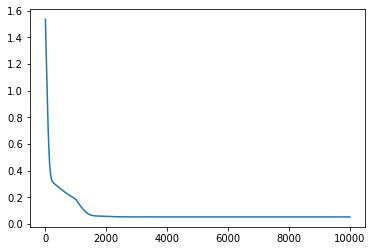

In [155]:
plt.plot(loss_plt)
loss_plt[-1]

In [156]:
print(params)

[Parameter containing:
tensor([[ 0.0098,  0.3464,  0.0045,  0.1601, -0.0399,  0.3538, -0.0598, -0.2273,
         -0.2377, -0.0015, -0.1001, -0.2704, -0.1243,  0.0585,  0.1877, -0.1990,
          0.1881,  0.1335, -0.0614, -0.3133, -0.2849, -0.3122,  0.1764, -0.0507,
         -0.4274],
        [ 0.4221, -0.1159,  0.1332,  0.4648,  0.0702,  0.0924, -0.0211,  0.0387,
          0.0660,  0.3367,  0.0627,  0.0411, -0.1781, -0.0914, -0.0998,  0.0571,
          0.0876, -0.1636,  0.2526, -0.1007,  0.1261,  0.1630,  0.3545, -0.2262,
          0.1935],
        [-0.0018,  0.1199, -0.0618, -0.4179,  0.1219, -0.2062, -0.1634,  0.0495,
         -0.1599,  0.3622,  0.4137, -0.1069, -0.1311, -0.0468, -0.1454, -0.0679,
         -0.4986,  0.2946,  0.0911,  0.0747,  0.1952, -0.0230,  0.1187,  0.0030,
         -0.1624],
        [-0.0408,  0.2049, -0.0029,  0.2892, -0.2093, -0.1230,  0.0211,  0.3699,
         -0.2737, -0.1786, -0.0361,  0.0636,  0.1371,  0.3682, -0.2367,  0.1139,
         -0.0347,  0.3392, -0

In [157]:
W1 = params[0].requires_grad_(False)
W2 = params[1].requires_grad_(False)

In [158]:
W1.size()

torch.Size([20, 25])

In [159]:
# gradient check W1
mm(mm(transpose(W2, 0, 1), mm(W2, W1)-torch.eye(n)), mm(transpose(inputs, 0, 1), inputs))

tensor([[ 9.8958e-03,  9.7745e-03,  1.0483e-02,  1.0219e-02,  1.0283e-02,
          1.0302e-02,  1.0346e-02,  1.0406e-02,  1.0344e-02,  1.0069e-02,
          9.8833e-03,  1.0601e-02,  1.0192e-02,  1.0021e-02,  1.0467e-02,
          1.0325e-02,  1.0471e-02,  1.0020e-02,  9.7329e-03,  9.9254e-03,
          9.9537e-03,  9.8267e-03,  1.0078e-02,  9.9146e-03,  1.0292e-02],
        [ 1.5781e-02,  1.5730e-02,  1.6441e-02,  1.6452e-02,  1.6199e-02,
          1.6216e-02,  1.6535e-02,  1.6483e-02,  1.6610e-02,  1.6014e-02,
          1.5868e-02,  1.6809e-02,  1.6203e-02,  1.6028e-02,  1.6757e-02,
          1.6391e-02,  1.6624e-02,  1.5812e-02,  1.5629e-02,  1.5851e-02,
          1.5915e-02,  1.5691e-02,  1.6069e-02,  1.5904e-02,  1.6263e-02],
        [ 6.2551e-03,  6.2827e-03,  6.3807e-03,  6.5745e-03,  6.3305e-03,
          6.2753e-03,  6.5278e-03,  6.4295e-03,  6.6544e-03,  6.3262e-03,
          6.3794e-03,  6.6064e-03,  6.3934e-03,  6.3914e-03,  6.7432e-03,
          6.4374e-03,  6.5956e-03,  

In [160]:
# gradient check W2
mm(mm(mm(W2, W1)-torch.eye(n), mm(transpose(inputs, 0, 1), inputs)), transpose(W1, 0, 1))

tensor([[-3.5429e-03,  6.5550e-03, -1.3601e-03,  4.4200e-03,  2.8909e-03,
          4.8981e-03,  2.8737e-03, -2.4047e-03, -3.8810e-03, -5.1559e-03,
          2.5666e-03, -6.1436e-03,  1.0531e-03, -4.9900e-03, -4.0936e-03,
         -7.6139e-04,  6.2791e-03, -1.6241e-03,  1.8631e-03,  2.6631e-03],
        [ 7.2622e-03, -1.3199e-02,  2.7905e-03, -9.8251e-03, -5.6880e-03,
         -1.0624e-02, -6.5827e-03,  5.2056e-03,  8.1633e-03,  1.0370e-02,
         -5.0795e-03,  1.2439e-02, -2.1515e-03,  9.7365e-03,  9.1298e-03,
          1.1752e-03, -1.3253e-02,  3.2411e-03, -3.9769e-03, -5.4142e-03],
        [-3.8395e-03,  7.5746e-03, -1.7593e-03,  7.1715e-03,  3.3972e-03,
          7.0574e-03,  4.2119e-03, -3.5543e-03, -4.7189e-03, -6.2661e-03,
          2.9297e-03, -7.3841e-03,  1.3738e-03, -5.0020e-03, -5.9175e-03,
         -5.0235e-04,  8.2126e-03, -1.8892e-03,  2.4453e-03,  3.0348e-03],
        [-8.3857e-03,  1.4533e-02, -3.0174e-03,  8.2591e-03,  6.2022e-03,
          9.7909e-03,  6.5036e-03, 